In [ ]:
# # install spicy-snow in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install spicy-snow

In [1]:
# import spicy-snow functions and other required packages
# depending on your environment, you may need to install some of these
from spicy_snow.retrieval import retrieve_snow_depth
from spicy_snow.IO.user_dates import get_input_dates
import geopandas as gpd
from pathlib import Path
from shapely import geometry
# for optional plotting
import contextily as cx 
import matplotlib.pyplot as plt

In [2]:
# to use lat-lon range for aoi
#area = geometry.box(-113.2, 43, -113, 43.4)

# to use geojson for aoi
# geojson is expected to be in wgs84. 
area_gdf = gpd.read_file('./erb_pumphouse_wgs.geojson')
area = list(area_gdf.geometry)[0].envelope # convert feature to box for search

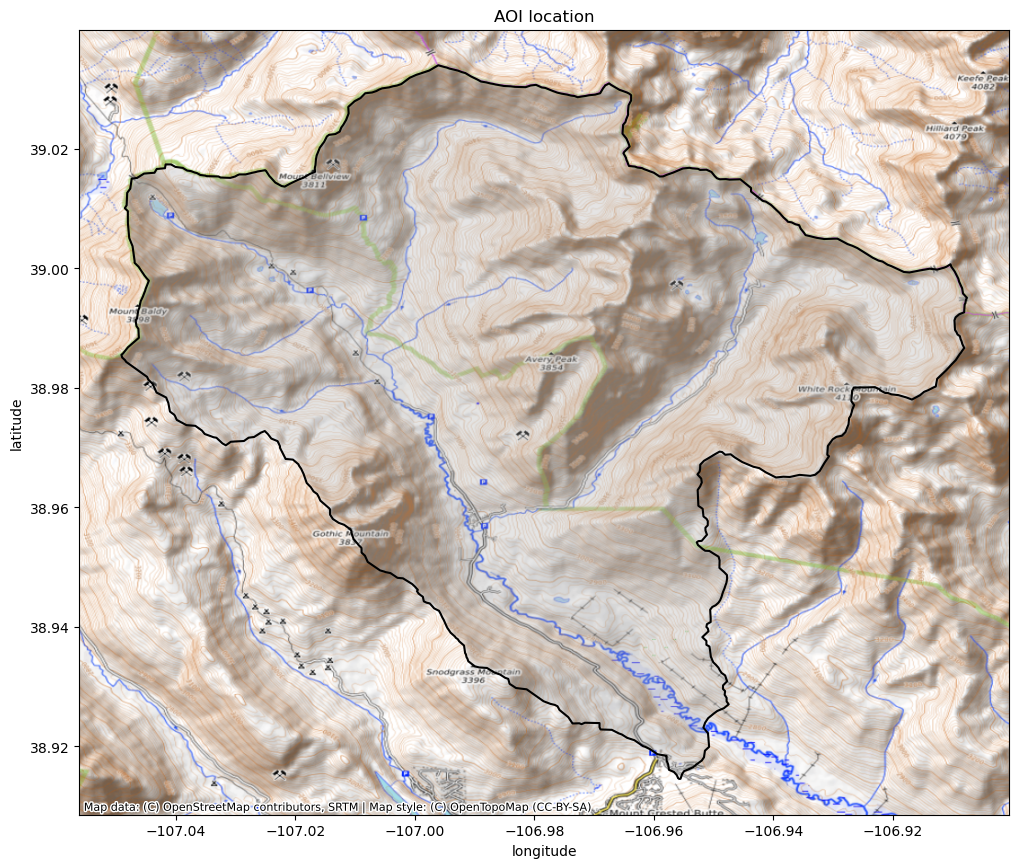

In [3]:
# Plot aoi
fig, ax = plt.subplots(figsize=(12,12))
area_gdf.plot(ax=ax,
              color='darkgrey',
              alpha=0.3)
area_gdf.boundary.plot(ax=ax,
                       color='k')

cx.add_basemap(ax=ax, crs=area_gdf.crs.to_string(), source=cx.providers.OpenTopoMap);
ax.set_xlabel('longitude');
ax.set_ylabel('latitude');
ax.set_title('AOI location');

In [4]:
# this will generate a tuple of dates from the previous August 1st to this date
dates = get_input_dates('2020-07-31') # run on all S1 images from 2020-08-01 through 2021-07-31

In [ ]:
# define output directory and file name
out_nc = Path(f'.data/sd_{dates[0]}_{dates[1]}.nc').expanduser()

spicy_ds = retrieve_snow_depth(area = area, dates = dates, 
                               work_dir = Path('/tmp/er_test/').expanduser(), 
                               job_name = f'sd_{dates[0]}_{dates[1]}',
                               existing_job_name = f'sd_{dates[0]}_{dates[1]}',
                               debug=False,
                               outfp=out_nc)

(spicy-snow spicy_snow.utils.spicy_logging INFO) Found 147 results


NASA Earthdata Login username:  qbrencherUW
NASA Earthdata Login password:  ········


Submitting s1 jobs: 100%|███████████████████████████████████████████████████| 147/147 [01:54<00:00,  1.28it/s]

(spicy-snow spicy_snow.utils.spicy_logging INFO) Watching 147 jobs. This may take a while...


  0%|          | 0/147 [timeout in 10800 s]